In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
import matplotlib

In [2]:
def plotter(fig_no,arg1,arg2,label_x,label_y,type=plt.plot,arg3='b-',title="",cmap = matplotlib.cm.jet):
    plt.figure(fig_no)
    plt.grid()
    if type==plt.contourf:
        type(arg1,arg2,arg3,cmap=cmap)
        plt.colorbar()
    else:
        type(arg1,arg2,arg3)
    plt.xlabel(label_x,size =19)
    plt.ylabel(label_y,size =19)
    plt.title(title)
    


In [3]:
def input_fn(decay=0.5,cos_term=1.5):
    return np.poly1d([1,decay]),np.poly1d([1,2*decay,cos_term**2+decay**2])

def transfer_fn():
    return (np.poly1d([1]), np.poly1d([1,0,2.25]))

def input_td(t,freq,decay):
    return(np.cos(freq*t)*np.exp(-1*decay*t))

In [4]:
def solve(decay):
    Hn, Hd = transfer_fn()
    Fn, Fd = input_fn(decay)
    np.polymul(Fn,Hn)
    t = np.linspace(0,50,200)
    Y = sp.lti(np.polymul(Fn,Hn),np.polymul(Fd,Hd))
    t, y = sp.impulse(Y,None,t)
    plotter(1,t,y,"t","y(t)",title="System response with decay {}".format(decay))
    plt.show()


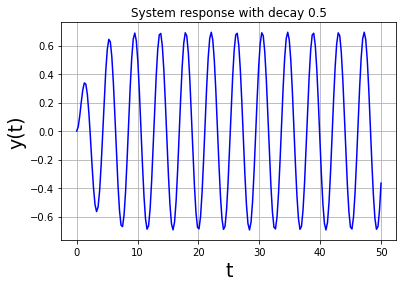

In [5]:
solve(0.5)

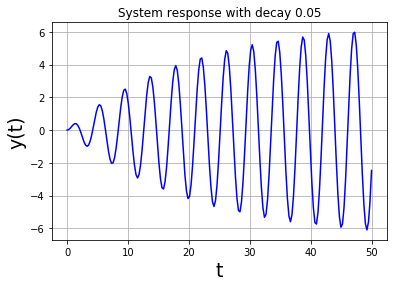

In [6]:
solve(0.05)

In [7]:
def loop_freq(decay = 0.05):
    t = np.linspace(0,100,300)
    Hn,Hd = transfer_fn()
    H = sp.lti(Hn,Hd)
    l=['k','g','r','c','m']
    fl = np.arange(1.4,1.6,0.05)
    
    for i in range(5):
        u = input_td(t,fl[i],decay)
        t,y,svec = sp.lsim(H,u,t)
        plotter(1,t,y,"t","y(t)",
title="System response with decay 0.05 and various frequencies",
arg3=l[i]+'-')
    plt.legend(["freq {}".format(i) for i in fl])
    return(H.bode())



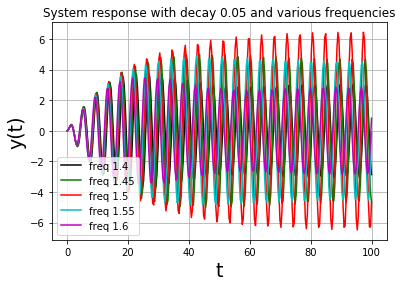

In [8]:
w,s,phi = loop_freq()
plt.show()

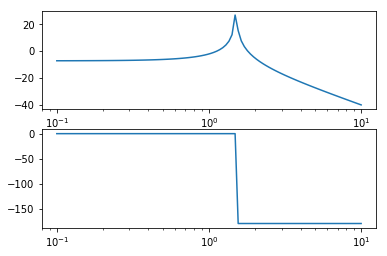

In [11]:
plt.subplot(2,1,1)
plt.semilogx(w,s)
plt.subplot(2,1,2)
plt.semilogx(w,phi)
plt.show()

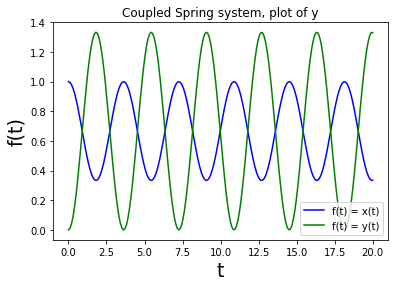

In [24]:
def coupled():
    t = np.linspace(0,20,200)
    X = sp.lti([1,0,2],[1,0,3,0])
    Y = sp.lti([2],[1,0,3,0])
    t,x = sp.impulse(X, None, t)
    t,y = sp.impulse(Y, None, t)
    plotter(1,t,x,"t","f(t)",title="Coupled Spring system, plot of x")
    plotter(1,t,y,"t","f(t)",title="Coupled Spring system, plot of y",arg3 ="g-")
    plt.legend(["f(t) = x(t)","f(t) = y(t)"])
coupled()
plt.show()

(poly1d([1]), poly1d([1.e-12, 1.e-04, 1.e+00]))


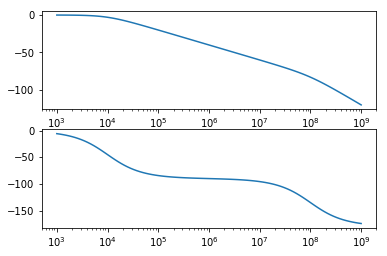

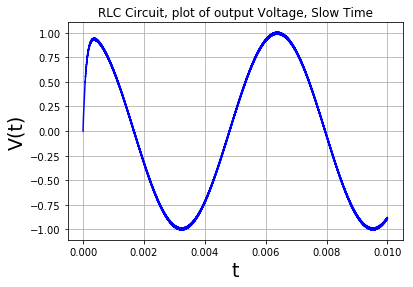

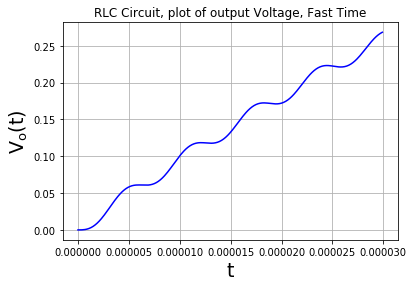

In [34]:
def rlc_tf():
    return(np.poly1d([1]),np.poly1d([1e-12,1e-4,1]))
print(rlc_tf())

def rlc_input(t):
    return(np.cos(1e3*t)-np.cos(1e6*t))
def solve_rlc():
    t = np.arange(0,10e-3,1e-7)
    Hn,Hd = rlc_tf()
    H = sp.lti(Hn,Hd)
    w,s,phi = H.bode()
    plt.subplot(2,1,1)
    plt.semilogx(w,s)
    plt.subplot(2,1,2)
    plt.semilogx(w,phi)
    plt.show()
    u = rlc_input(t)
    t,x,svec = sp.lsim(H,u,t)
    
    plt.rcParams.update({'mathtext.default':  'regular' })
    plotter(1,t,x,"t","V(t)",title="RLC Circuit, plot of output Voltage, Slow Time")
    plotter(2,t[0:300],x[0:300],"t","V(t)",title="RLC Circuit, plot of output Voltage, Fast Time")

    plt.ylabel('$V_{o}(t)$')
solve_rlc()
plt.show()